<a href="https://colab.research.google.com/github/bpratik01/Computer-Vision-Notes-PyTorch-/blob/main/ADV_CV_ARCHITECTURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ResNet (Residual Networks)**



## **1. The Need for ResNet**

### Challenges in Training Deep Neural Networks
- **Deeper networks** were hypothesized to learn better due to their ability to capture more complex features.
- However, in practice:
  - Increasing the number of layers leads to **degradation in performance** beyond a certain depth.
  - **Optimization challenges** arise, making deep networks difficult to train effectively.

### Key Problems in Deep Networks
1. **Degradation Problem**:
   - Adding more layers to an already deep network can reduce training and test accuracy.
   - This is not caused by overfitting but by optimization difficulties.
   - Layers in very deep networks fail to converge to optimal solutions.
   
2. **Vanishing Gradient Problem**:
   - Gradients become very small as they propagate backward in deep networks.
   - This prevents earlier layers from learning effectively, leading to **stalled training**.
   - Common in activation functions like sigmoid and tanh.

3. **Exploding Gradient Problem**:
   - In some cases, gradients grow excessively large during backpropagation, leading to instability and convergence issues.

---

## **2. Insights from the ResNet Research Paper**

### The "Plain Network" Observation
- The paper compared **plain networks** (deep networks without skip connections) with residual networks.
- Findings:
  - Deeper plain networks showed **lower training accuracy** than their shallower counterparts, even though they had more parameters.
  - This degradation was not due to overfitting but due to the inability of the network to optimize deeper architectures.

### Identity Mapping Challenge
- Deeper networks should ideally learn identity mappings (i.e., output = input) when additional layers do not provide improvements.
- In practice, learning these identity mappings is difficult for standard deep networks.

---

## **3. Residual Learning: The Key Proposal of ResNet**

### Core Idea
- ResNet introduces **residual connections** or **shortcut connections** to address optimization challenges in deep networks.
- Instead of learning the target function \(H(x)\), the residual block learns the **residual function** \(F(x) = H(x) - x\).
- Final output of the residual block:
  \[
  H(x) = F(x) + x
  \]

### Benefits of Residual Learning
1. **Easier Optimization**:
   - Learning residuals (differences) is simpler than learning the complete function.
   - The network can more easily approximate the identity function if required.

2. **Mitigation of Vanishing Gradients**:
   - Gradients flow directly through shortcut connections, preserving the signal strength.
   - This ensures effective backpropagation even in very deep networks.

3. **Allows Training of Deeper Networks**:
   - With residual blocks, ResNet successfully trains networks with over 100 layers (e.g., ResNet-152).
   - This contrasts with plain networks, where performance degrades significantly beyond 20-30 layers.

---

## **4. Key Features of ResNet Architecture**

### Residual Block
- Composed of:
  - Two or three convolutional layers.
  - A **skip connection** that directly adds the input to the output of the convolutional layers.
  - **Activation Function**: ReLU.
- Formula for output:
  \[
  y = F(x, \{W_i\}) + x
  \]

### Bottleneck Design (for Deeper Networks)
- Used in deeper versions like ResNet-50, ResNet-101, and ResNet-152.
- Reduces the number of parameters and computational cost:
  - A **1x1 convolution** compresses the feature map dimensions.
  - A **3x3 convolution** performs the primary operation.
  - Another **1x1 convolution** restores the original dimensions.

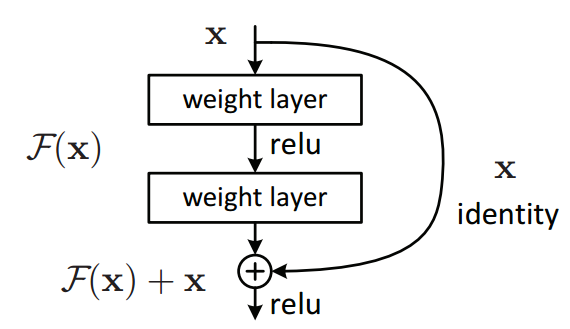
---


## **5. ResNet Variants and Applications**

### ResNet Variants
- **ResNet-18, ResNet-34**:
  - Use basic residual blocks.
- **ResNet-50, ResNet-101, ResNet-152**:
  - Use bottleneck blocks for deeper networks.

### Applications
- **Image Classification**:
  - State-of-the-art results on benchmarks like ImageNet.
- **Object Detection**:
  - ResNet-based backbones used in models like Faster R-CNN.
- **Transfer Learning**:
  - Pretrained ResNet models are widely used for transfer learning across diverse computer vision tasks.

---

## **7. Limitations of ResNet**
- **Computational Complexity**:
  - Deeper models like ResNet-152 are computationally expensive to train.
- **Shortcut Dependency**:
  - The success of ResNet heavily depends on the effectiveness of shortcut connections.
- **Redundancy in Deeper Layers**:
  - Some very deep layers may become redundant, as they primarily learn identity mappings.

---

## **Summary**
- ResNet was introduced to address the **degradation problem** and **vanishing gradients** in deep networks.
- By introducing **residual connections**, it enabled effective training of networks with over 100 layers.
- ResNet set a new benchmark for deep learning architectures, proving that **depth combined with optimization strategies** leads to improved performance.
- Its principles remain foundational in modern architectures, making it a cornerstone of deep learning research and practice.


## **Building and Fine Tuning Resnet34**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### Data Preparation

In [19]:
BATCH_SIZE = 64
EPOCHS = 15

In [20]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

In [21]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

In [22]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

### **Fine tuning the model**

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [25]:
model = models.resnet34(pretrained=False)

num_classes = len(train_data.classes)

model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model.fc = nn.Linear(model.fc.in_features, num_classes)

model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)


In [27]:
# Training Function
def train(epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}")
    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        progress_bar.set_postfix({"Loss": f"{running_loss / (batch_idx + 1):.4f}", "Accuracy": f"{100. * correct / total:.2f}%"})

# Testing Function
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc="Testing"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    print(f"Test Accuracy: {100. * correct / total:.2f}%")


In [28]:
for epoch in range(EPOCHS):
    train(epoch)
    test()
    scheduler.step()

Testing: 100%|██████████| 157/157 [00:06<00:00, 23.52it/s]


Test Accuracy: 35.96%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.61it/s]


Test Accuracy: 44.63%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.59it/s]


Test Accuracy: 63.29%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.58it/s]


Test Accuracy: 67.13%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.53it/s]


Test Accuracy: 69.72%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.58it/s]


Test Accuracy: 74.55%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.47it/s]


Test Accuracy: 78.10%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.44it/s]


Test Accuracy: 80.52%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.74it/s]


Test Accuracy: 79.21%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.78it/s]


Test Accuracy: 83.47%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.64it/s]


Test Accuracy: 84.05%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.79it/s]


Test Accuracy: 88.95%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.76it/s]


Test Accuracy: 90.09%


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.09it/s]


Test Accuracy: 91.32%


Testing: 100%|██████████| 157/157 [00:06<00:00, 22.96it/s]

Test Accuracy: 92.02%
